## Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data 

In [2]:
df = pd.read_csv('diabetes.csv')

In [38]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Train Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state = 123)

## Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
predictions = dtree.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       143
           1       0.70      0.73      0.72        88

    accuracy                           0.78       231
   macro avg       0.77      0.77      0.77       231
weighted avg       0.78      0.78      0.78       231



In [13]:
print(confusion_matrix(y_test,predictions))

[[116  27]
 [ 24  64]]


## Random Forest  

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
rf_pred = rf.predict(X_test)

print(classification_report(y_test,rf_pred))

print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       143
           1       0.69      0.61      0.65        88

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.75      0.75      0.75       231

[[119  24]
 [ 34  54]]


# Comparison with Other Approaches 

## Logistic Regression 

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
log_predictions = logmodel.predict(X_test)

In [19]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       143
           1       0.78      0.65      0.71        88

    accuracy                           0.80       231
   macro avg       0.79      0.77      0.78       231
weighted avg       0.80      0.80      0.79       231



In [20]:
print(confusion_matrix(y_test,log_predictions))

[[127  16]
 [ 31  57]]


## LPM

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lpm = LinearRegression().fit(X_train, y_train) 

In [24]:
y_hat = lpm.predict(X_test)

In [25]:
# Use 0.5 as cut-off value 

# Here is the prediction result. 

lpm_predictions = (y_hat>0.5) 

In [26]:
print(classification_report(y_test,lpm_predictions))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       143
           1       0.80      0.65      0.72        88

    accuracy                           0.81       231
   macro avg       0.80      0.77      0.78       231
weighted avg       0.80      0.81      0.80       231



In [27]:
print(confusion_matrix(y_test,lpm_predictions))

[[129  14]
 [ 31  57]]


## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

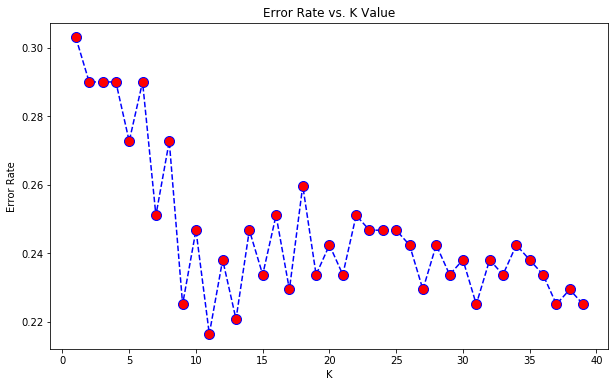

In [30]:
 
plt.figure(figsize=(10,6))

plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
k = 11
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=', k)
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K= 11


[[126  17]
 [ 33  55]]


              precision    recall  f1-score   support

           0       0.79      0.88      0.83       143
           1       0.76      0.62      0.69        88

    accuracy                           0.78       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



In [32]:
print(confusion_matrix(y_test,pred))

[[126  17]
 [ 33  55]]
